# Imports and Libraries

In [1]:
from helper_code import *
import numpy as np, os, sys, joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

# Explore the Distribution of the Lengths of Signal

In [2]:
dirs = ['data/cpsc', 'data/cpsc2', 'data/georgia', 'data/ptb', 'data/ptbxl', 'data/stpeters', 'data/chapman', 'data/ningbo']

data/cpsc
Total Size: 6877
Lengths. Max is 10.0


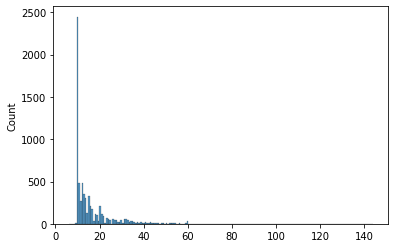

Frequencies. Max is 500.0


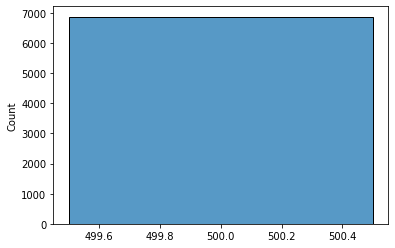

-----------------------------------------------------------------------------
data/cpsc2
Total Size: 3453
Lengths. Max is 10.0


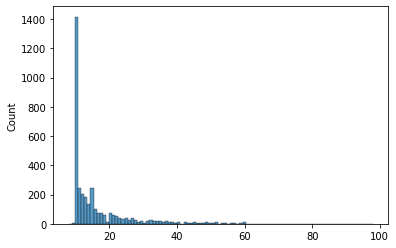

Frequencies. Max is 500.0


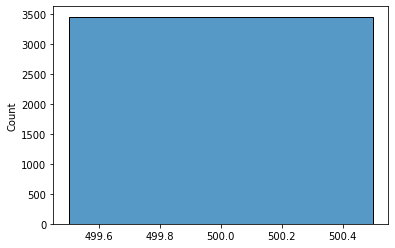

-----------------------------------------------------------------------------
data/georgia
Total Size: 10344
Lengths. Max is 10.0


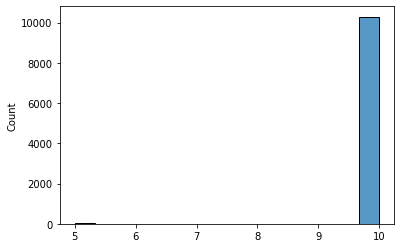

Frequencies. Max is 500.0


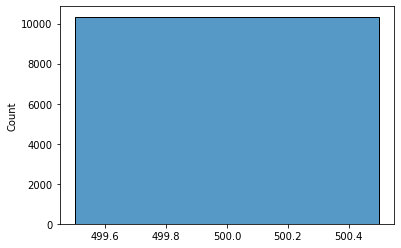

-----------------------------------------------------------------------------
data/ptb
Total Size: 516
Lengths. Max is 115.2


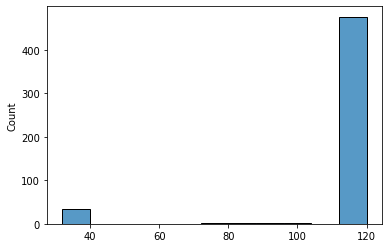

Frequencies. Max is 1000.0


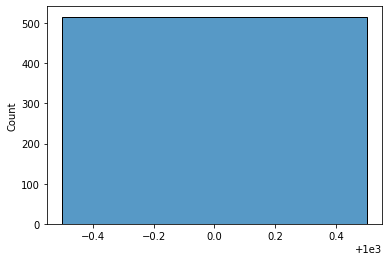

-----------------------------------------------------------------------------
data/ptbxl
Total Size: 21837
Lengths. Max is 10.0


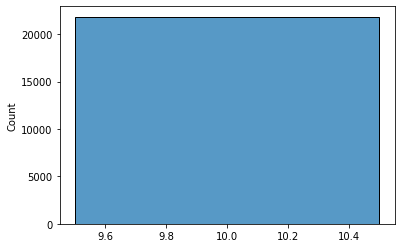

Frequencies. Max is 500.0


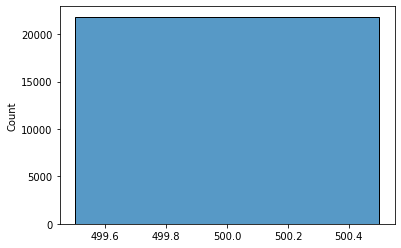

-----------------------------------------------------------------------------
data/stpeters
Total Size: 74
Lengths. Max is 1800.0


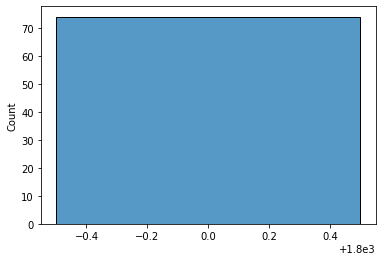

Frequencies. Max is 257.0


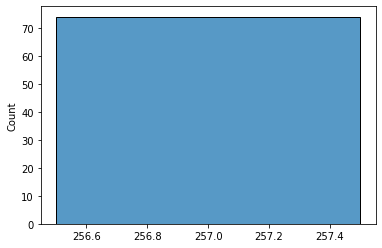

-----------------------------------------------------------------------------
data/chapman
Total Size: 10247
Lengths. Max is 10.0


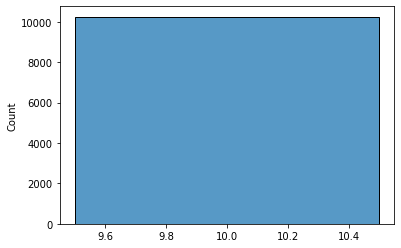

Frequencies. Max is 500.0


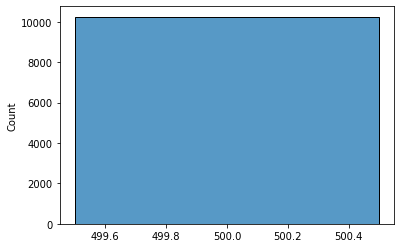

-----------------------------------------------------------------------------
data/ningbo
Total Size: 34905
Lengths. Max is 10.0


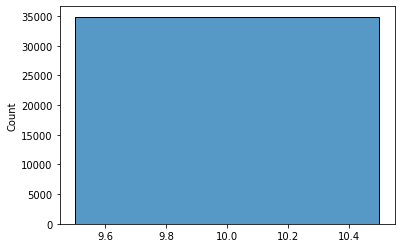

Frequencies. Max is 500.0


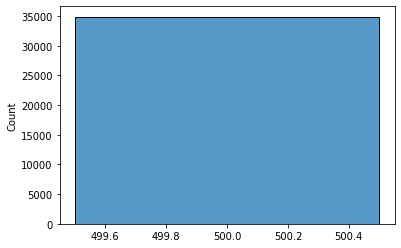

-----------------------------------------------------------------------------


In [3]:
for folder in dirs:
    print(folder)
    
    data_directory = folder
    headers, recordings = find_challenge_files(data_directory)

    length_arr, freq_arr = [], []

    for header_file in headers:
        header = load_header(header_file)

        freq = get_frequency(header)
        samples = get_num_samples(header)
        length = samples/freq

        freq_arr.append(freq)
        length_arr.append(length)

    print("Total Size: {}".format(len(length_arr)))
    print("Lengths. Max is {}".format(mode(length_arr)))
    sns.histplot(data=length_arr)
    plt.show()
    print("Frequencies. Max is {}".format(mode(freq_arr)))
    sns.histplot(data=freq_arr)
    plt.show()
    
    print("-----------------------------------------------------------------------------")

# Extract Relevant Recordings

Since PTB and St Petersburg has vastly varying lengths of ECGs and frequency, they are excluded from the final database

A dataframe is constructed with the recording filename and labels for Afib, Afl, SVT, and MI

It is then saved into a CSV

In [4]:
new_dirs = ['data/cpsc', 'data/cpsc2', 'data/georgia', 'data/ptbxl', 'data/chapman', 'data/ningbo']

In [5]:
dirs_dict = {'data/cpsc':'CP', 'data/cpsc2':'C2', 'data/georgia':'GE', 'data/ptbxl':'PT', 'data/chapman':'CH', 'data/ningbo':'NI'}

In [7]:
data_arr = []

for folder in new_dirs:    
    data_directory = folder
    headers, recordings = find_challenge_files(data_directory)

    for i in range(len(headers)):
        header = load_header(headers[i])
        samples = get_num_samples(header)
        
        # only data less than 20s is kept. clip the datasets longer than 10s to its first 10s
        if samples > 10000 or samples < 5000:
            continue
                
        entry = [recordings[i], 0, 0, 0, 0, '']
        
        header = load_header(headers[i])
        labels = get_labels(header)
        
        if '164889003' in labels:
            entry[1] = 1
        if '164890007' in labels:
            entry[2] = 1
        if '164865005' in labels:
            entry[3] = 1
        if '426761007' in labels:
            entry[4] = 1
        
        entry[5] = dirs_dict[data_directory]

        data_arr.append(entry)

In [8]:
df = pd.DataFrame(data_arr, columns = ['Recording', 'Afib', 'Afl', 'MI', 'SVT', 'DB'])
df

,Recording,Afib,Afl,MI,SVT,DB
0,data/cpsc/A4924.mat,0,0,0,0,CP
1,data/cpsc/A2054.mat,0,0,0,0,CP
2,data/cpsc/A5391.mat,0,0,0,0,CP
3,data/cpsc/A3580.mat,0,0,0,0,CP
4,data/cpsc/A4948.mat,0,0,0,0,CP
...,...,...,...,...,...,...
85738,data/ningbo/JS32861.mat,0,0,0,0,NI
85739,data/ningbo/JS41305.mat,0,0,0,0,NI
85740,data/ningbo/JS25189.mat,0,0,0,0,NI
85741,data/ningbo/JS42616.mat,0,0,0,0,NI


In [9]:
recording_file = df.iloc[37438]['Recording']
recording = load_recording(recording_file)

print("Recording is of type {}".format(type(recording)))
print("Recording shape: {}".format(recording.shape))

Recording is of type <class 'numpy.ndarray'>
Recording shape: (12, 5000)


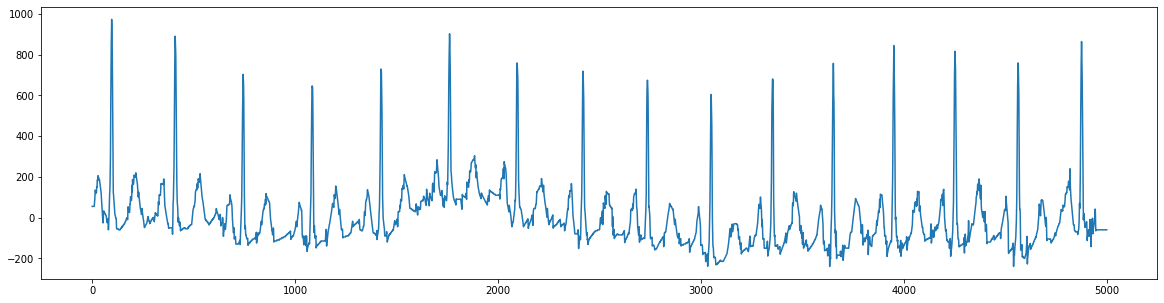

In [11]:
plt.figure(figsize=(20,5))
plt.plot(list(range(len(recording[1]))), recording[1])

In [12]:
df[df['Afib'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
31,data/cpsc/A5561.mat,1,0,0,0,CP
38,data/cpsc/A1953.mat,1,0,0,0,CP
41,data/cpsc/A0406.mat,1,0,0,0,CP
48,data/cpsc/A2967.mat,1,0,0,0,CP
49,data/cpsc/A1842.mat,1,0,0,0,CP
...,...,...,...,...,...,...
50799,data/chapman/JS03763.mat,1,0,0,0,CH
50803,data/chapman/JS05456.mat,1,0,0,0,CH
50808,data/chapman/JS08479.mat,1,0,0,0,CH
50822,data/chapman/JS09092.mat,1,0,0,0,CH


In [13]:
df[df['Afl'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
5925,data/cpsc2/Q3023.mat,0,1,0,0,C2
5953,data/cpsc2/Q2166.mat,0,1,0,0,C2
5990,data/cpsc2/Q2088.mat,0,1,0,0,C2
6026,data/cpsc2/Q2653.mat,0,1,0,0,C2
6057,data/cpsc2/Q1875.mat,0,1,0,0,C2
...,...,...,...,...,...,...
85722,data/ningbo/JS13450.mat,0,1,0,0,NI
85724,data/ningbo/JS13262.mat,0,1,0,0,NI
85730,data/ningbo/JS10784.mat,0,1,0,0,NI
85732,data/ningbo/JS15243.mat,0,1,0,0,NI


In [14]:
df[df['MI'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
5670,data/cpsc2/Q2469.mat,0,0,1,0,C2
5671,data/cpsc2/Q0241.mat,0,0,1,0,C2
5678,data/cpsc2/Q2838.mat,0,0,1,0,C2
5687,data/cpsc2/Q1603.mat,0,0,1,0,C2
5690,data/cpsc2/Q1892.mat,0,0,1,0,C2
...,...,...,...,...,...,...
83800,data/ningbo/JS20155.mat,0,0,1,0,NI
83907,data/ningbo/JS20932.mat,0,0,1,0,NI
84249,data/ningbo/JS23023.mat,0,0,1,0,NI
84525,data/ningbo/JS12422.mat,0,0,1,0,NI


In [15]:
df[df['SVT'] == 1]

,Recording,Afib,Afl,MI,SVT,DB
5783,data/cpsc2/Q0348.mat,0,0,1,1,C2
6978,data/cpsc2/Q0229.mat,0,0,0,1,C2
7475,data/cpsc2/Q0645.mat,0,0,0,1,C2
8752,data/georgia/E03335.mat,0,0,0,1,GE
9805,data/georgia/E01993.mat,0,0,0,1,GE
...,...,...,...,...,...,...
84697,data/ningbo/JS12526.mat,0,0,0,1,NI
84986,data/ningbo/JS21342.mat,0,0,0,1,NI
85036,data/ningbo/JS21129.mat,0,0,0,1,NI
85227,data/ningbo/JS45374.mat,0,0,0,1,NI


In [16]:
df.to_csv('full_dataset.csv', index=False)